In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Load dataset
data = pd.read_csv('../data/synthetic_fin_data.csv')
print(data.head())

# Split for credit scoring
X_credit = data.drop(['credit_score', 'is_fraud'], axis=1)
y_credit = data['credit_score']

# Split for fraud detection
X_fraud = data.drop(['credit_score', 'is_fraud'], axis=1)
y_fraud = data['is_fraud']

   upi_txn_count  avg_txn_value  bill_payments  wallet_balance  sms_count  \
0            107     920.005543              5     9803.079025        750   
1            353    1639.615959              3     4830.996635       1745   
2            275    1224.976149              1     5369.349558       1093   
3            111    1481.288738              3     1766.535864       1438   
4             76    1855.215065              0     2544.383524       1000   

   data_usage_gb  ecom_purchases  refund_count  income_bracket  age  \
0      26.110994              20             5               3   34   
1       9.272165               3             3               3   47   
2       5.294871              26             0               2   38   
3      20.430829               1             2               4   30   
4       1.623546               1             4               3   18   

   txn_variance  credit_score  is_fraud  
0    637.177568    384.505736         1  
1    700.787498    372.133

In [2]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)

# Train model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# ±10% Tolerance Check
tolerance = 0.10 * y_test.mean()
within_tolerance = np.mean(np.abs(y_test - y_pred) <= tolerance)
print(f"Within ±10% Tolerance: {within_tolerance * 100:.2f}%")

MAE: 17.72
R² Score: 0.67
Within ±10% Tolerance: 94.50%


In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.76
Confusion Matrix:
 [[133  19]
 [ 29  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       152
           1       0.50      0.40      0.44        48

    accuracy                           0.76       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.74      0.76      0.75       200



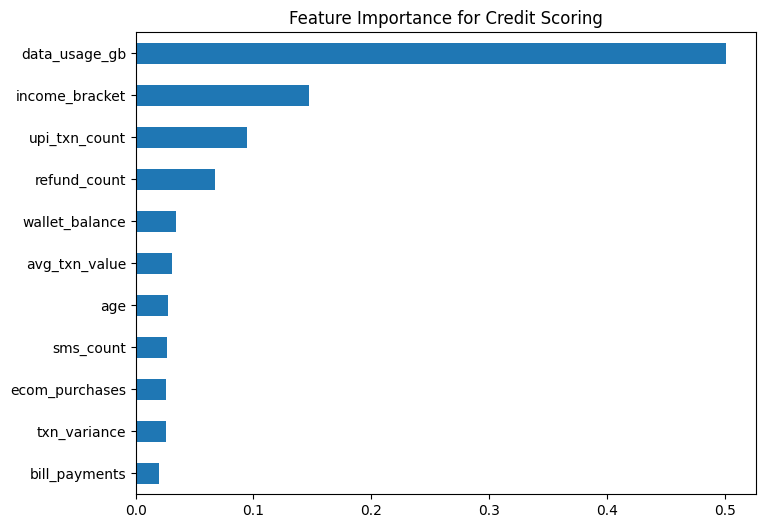

In [4]:
import matplotlib.pyplot as plt

importances = pd.Series(regressor.feature_importances_, index=X_credit.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance for Credit Scoring")
plt.show()